# DSCI 100 Project - Individual Planning Stage

This project aims to describe and summarize the given dataset, wrangle the set to make it tidier and easier to visualize and model, and provide the method of prediction to predict the response variable using 1-3 explanatory variables.

In [1]:
library (tidyverse)
library (repr)
library (tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players <- read_csv("players.csv") 
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


### (1) Data Description

Data Overview :
- Number of observations (rows): 196
- Number of variables (columns): 7

Variable Summary :
##### Table 1 - Description of all the variables in players


| Variable Name | Data Type | Description | 
| ------------- | --------- | ----------- |
| experience    | character    | The level of gaming experience the player has in this game (Possible values : "Pro", "Amateur", "Regular", "Beginner") |
| subscribe     | logical   | Whether or not the player is subscribed to the minecraft newsletter (Possible values : true or false) |
| hashedEmail   | character | Encoded or crypted email adresses of the players (for privacy) |
| played_hours  | double    | Total hours a player has played Minecraft |
| name          | character | Name of the players |
| gender        | factor    | Gender of the player |
| age           | integer   | Age of the player (years) |


Summary of the dataset :

In [3]:
summary_players <- summary(players)
summary_players

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

Summary Statistics (for numeric data) :

##### Table 2 - Summary Statistics for numeric variables in the dataset

| Variable | Count | Mean | Min | Max |
| -------- | ----- | ---- | --- | --- |
| played_hours | 196 | 5.85 | 0 | 223.10 |
| age      | 194     | 21.14 | 9 | 58.00 |


Issues observed in the dataset :
 - Outliers
    - played_hours : Most players have played the game under an hour whereas only a few players have played it over 200 hours resulting into this huge gap, which might cause problems if we have to predict a variable or if we have to visualize the dataset.
    - age : Most of the players are young (youngest player is 9 years old) while there are only a few older players which can result in errors while entering the data or predicting a response variable.
 - Missing data
    - age has 2 missing entries.
 - Data Type Issues
    - experience is stored as an character whereas it should be stored as a factor because it has only 5 specifc possible values.
  
Potential Issues in the dataset :
 - Sampling Bias: Dataset does not represent a general or balanced population (As described in the outliers section above).
 - Measurement Bias: played_hours may rely on self-reported data rather than tracked data, which can lead to inaccuracies.
 - Ethical Considerations: Inclusion of players under 18 years of age could raise consent and privacy concerns depending on data use.
 - Anonymity: Linkage across different databases may not be possible due to the usage of hashedEmail instead of actual email addresses.

Data Collection : 
- This dataset is collected from the findings of the minecraft server set up by Dr. Frank Wood and his colleagues for their research project.

### (2) Questions

Broad Question :
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Specific Question :
Can played_hours and experience (behavioural factors - explanatory variables) help in predicting subscribe (response variable) in the players dataset?

Addressing the Question:
- I have chosen player_hours and experience as my explanatory variables because these variables can affect the prediction more than the age or gender of the player.
- By modelling subscribe, we can use logistic regression, k-nn nearest neighbors or other predictive methods in order to estimate the likeliness of a player to subscribe to the newsletter.
- The strength and direction of the relationships between the explanatory variables and the response variable can reveal which player feature is the most predictive.

Plan to wrangle the data :
- In order to predict the data, we have to first tidy it to make it easier to comprehend and visualize.
- First, I believe the experience variable should be changed into a factor rather than a character.
- Second, the dataset should only include the data we need to answer the specific question (i.e subscribe, experience, and played_hours). This will also make the dataset short and concise.
- Third, I believe we need to standardize the played_hours, so the prediction becomes more accurate and is not affected by the huge gap between the values of the variable. 

### (3) Exploratory Data Analysis and Data Visualization

Wrangling the dataset :

In [4]:
players_tidy <- players |>
                select(subscribe, experience, played_hours) |>
                mutate(experience = as.factor(experience))
players_tidy

subscribe,experience,played_hours
<lgl>,<fct>,<dbl>
TRUE,Pro,30.3
TRUE,Veteran,3.8
FALSE,Veteran,0.0
⋮,⋮,⋮
FALSE,Amateur,0.0
FALSE,Amateur,2.3
TRUE,Pro,0.2


Table 3 - Mean Values of Quantitative Variables in the dataset :

| Variable | Mean |
| -------- | ---- |
| played_hours | 5.85 |
| age      | 21.14 |

Exploratory Visualizations :
1. Distribution of the hours of minecraft played by the players (histogram)
2. Plot of experience with the subscription (bar graph)

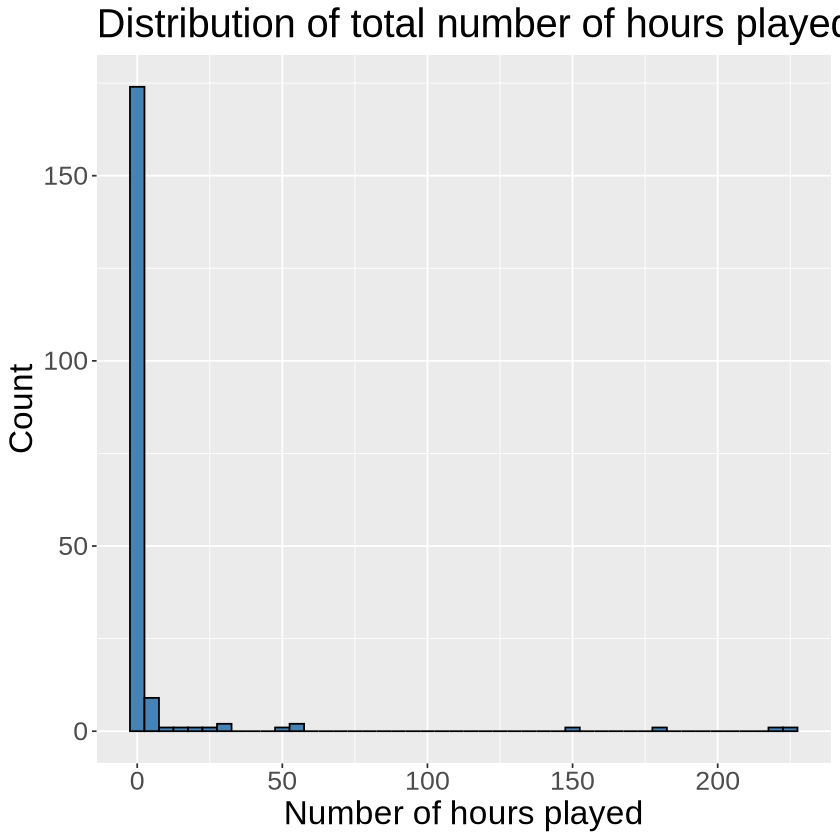

In [6]:
played_hours_visual <- players_tidy |>
                       ggplot(aes(x = played_hours)) +
                       geom_histogram(binwidth = 5, fill = "steelblue", color = "black") +
                       labs(title = "Distribution of total number of hours played", x = "Number of hours played", y = "Count") +
                       theme(text = element_text(size=20))

played_hours_visual

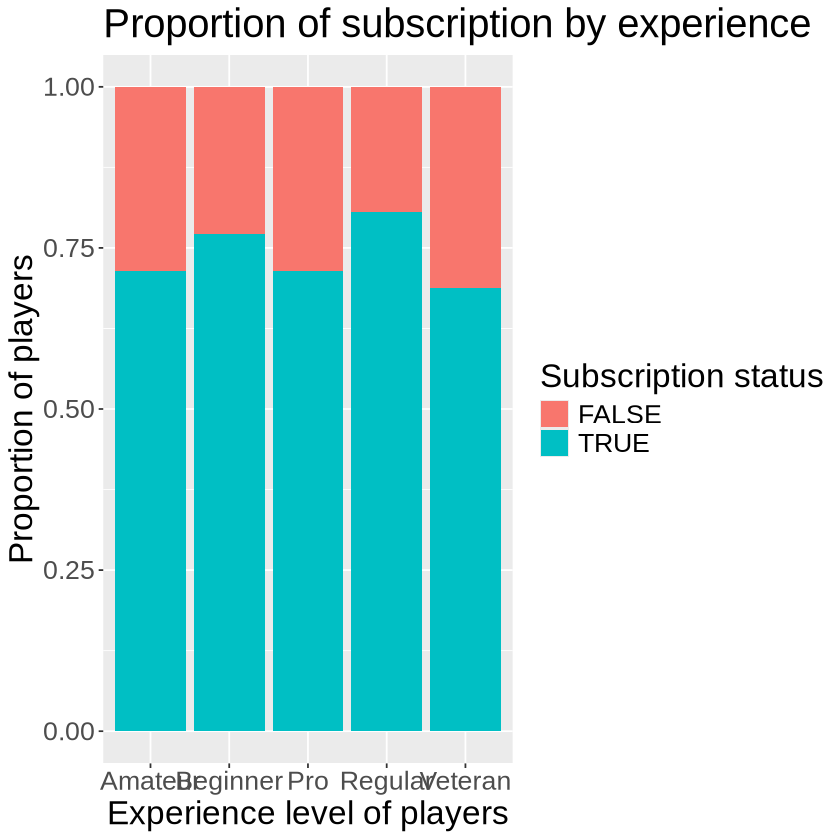

In [9]:
players_plot <- players_tidy |>
                ggplot(aes(x = experience, fill = subscribe)) +
                geom_bar(position = "fill") +
                labs(title = "Proportion of subscription by experience", x = "Experience level of players", y = "Proportion of players", fill = "Subscription status") +
                theme(text = element_text(size=20))
players_plot

Insights gathered :
Subscription levels seem to be higher for Regular and Beginner (also amateur) players which means that there might be a negative relationship between the experience level and subscribe.

### (4) Methods and Plan